Em parceria com Ana Luiza Young

# Pipelines, PCA, Regression, Regularization, Clustering

Este estudo visa descobrir qual o país de origem de uma música, com base nos dados de características sonoras de áudios extraídos com o programa MARSYAS

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 15)
data = pd.read_csv('default_features_1059_tracks.txt', sep=",", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
5,0.059217,0.034537,-0.703441,0.188652,-0.270353,1.420526,0.467766,0.209594,-0.496505,1.239908,...,0.501017,-0.354263,0.445184,0.060328,0.075293,-0.170387,-0.506187,-0.008470,12.65,-8.00
6,-0.280628,-0.310082,-0.756816,0.839033,-0.196670,1.153469,-0.473974,1.491603,-0.105328,1.365001,...,0.473937,-0.433843,0.813016,1.101685,-0.936123,-0.280096,-0.995073,-0.872726,12.65,-8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,-0.256823,-0.428191,-0.466053,0.253888,0.293756,0.500720,-1.031035,0.379445,-2.402813,0.122309,...,-0.722710,-0.826932,0.723062,-0.445762,-0.308901,-0.641950,-0.576358,-0.877030,41.71,44.78
1053,-0.108116,-0.096406,-0.044216,-0.502113,-0.279755,-0.003784,-0.036097,0.159209,0.161302,0.210124,...,-0.392326,-0.700825,-1.046674,-0.853647,-0.298798,-0.612668,-0.549285,-0.720027,-6.17,35.74


Temos uma base consideravelmente extensa. Vamos reduzir o escopo do estudo para apenas três capitais:

In [2]:
data_sorted = data.sort_values(68, 0, ascending = True)
data_s = data_sorted.iloc[0:100,0:70]

In [3]:
data_s

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
862,2.654318,3.802507,1.850741,-1.498866,-0.016933,-1.285616,-0.611298,-0.858004,-0.157574,-0.083673,...,1.198014,0.792160,1.106937,1.111763,0.680543,0.566725,0.859375,0.763855,-35.30,149.12
952,-0.011290,0.513719,-0.265201,0.407658,0.819534,-0.438491,-0.604161,0.147343,-0.371392,0.277186,...,1.870620,-0.373196,-0.282956,0.147258,-0.259322,0.341126,1.178357,1.040092,-35.30,149.12
769,-0.631194,-0.262990,0.272927,-0.098273,-1.588519,0.290227,1.454731,1.686073,0.263640,0.325048,...,-1.146426,-1.472497,-1.353373,-1.173457,-1.190651,-1.029769,-1.038497,-1.044751,-35.30,149.12
1045,-1.143279,-0.970393,6.157847,0.025562,-1.716427,-0.823866,1.131733,1.795106,1.090198,0.622713,...,-0.401103,-0.715838,-1.018796,-1.161952,-0.732602,-0.728074,-0.846290,-0.625809,-35.30,149.12
379,-0.342382,-0.140043,0.108868,-0.316431,0.937211,-0.394483,0.199727,0.206463,0.574196,0.202469,...,-0.707537,-1.395699,-0.565634,-0.882047,-0.960137,-0.963599,-0.599492,-0.644709,-35.30,149.12
102,-0.671627,0.450732,-0.353678,-0.826033,-2.962756,0.518470,1.059118,-1.514302,-0.410684,-0.646368,...,1.139840,1.173263,0.753943,0.692725,1.017846,0.958773,0.290780,0.466558,-35.30,149.12
101,1.221129,1.029825,0.927910,-0.348908,-2.083373,0.013500,0.482777,0.854047,0.392935,0.354896,...,0.781187,0.056201,-0.268921,0.096147,-0.210972,-0.328149,-0.677705,0.076826,-35.30,149.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,0.186754,0.154917,-0.346313,0.651092,-0.553629,-0.416605,1.215530,0.283565,1.568135,-0.111186,...,-0.139389,0.978460,-0.073073,0.615186,0.824474,1.434154,1.310835,3.720505,-6.17,35.74
714,0.794907,1.083795,0.070215,0.452843,-0.622836,-1.152758,-0.395130,0.804106,-0.260289,-1.310674,...,-0.823697,0.541084,-0.511710,-0.561480,0.220023,0.049600,-0.519680,-0.350503,-6.17,106.82


In [4]:
pd.set_option('display.max_rows', None)
data_s.iloc[0:101,68:70]

,68,69
862,-35.30,149.12
952,-35.30,149.12
769,-35.30,149.12
1045,-35.30,149.12
379,-35.30,149.12
102,-35.30,149.12
101,-35.30,149.12
673,-35.30,149.12
99,-35.30,149.12
481,-35.30,149.12


In [5]:
dt = data_s.iloc[0:95,:]

In [6]:
len(dt.axes[0])

95

Como queremos apenas três capitais, vamos deletar as linhas correspondentes às células da coluna de índice 69 (longitude) que contém o valor 106.82

In [7]:
datum = dt[dt[69] != 106.82]

In [8]:
datum

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
862,2.654318,3.802507,1.850741,-1.498866,-0.016933,-1.285616,-0.611298,-0.858004,-0.157574,-0.083673,...,1.198014,0.792160,1.106937,1.111763,0.680543,0.566725,0.859375,0.763855,-35.30,149.12
952,-0.011290,0.513719,-0.265201,0.407658,0.819534,-0.438491,-0.604161,0.147343,-0.371392,0.277186,...,1.870620,-0.373196,-0.282956,0.147258,-0.259322,0.341126,1.178357,1.040092,-35.30,149.12
769,-0.631194,-0.262990,0.272927,-0.098273,-1.588519,0.290227,1.454731,1.686073,0.263640,0.325048,...,-1.146426,-1.472497,-1.353373,-1.173457,-1.190651,-1.029769,-1.038497,-1.044751,-35.30,149.12
1045,-1.143279,-0.970393,6.157847,0.025562,-1.716427,-0.823866,1.131733,1.795106,1.090198,0.622713,...,-0.401103,-0.715838,-1.018796,-1.161952,-0.732602,-0.728074,-0.846290,-0.625809,-35.30,149.12
379,-0.342382,-0.140043,0.108868,-0.316431,0.937211,-0.394483,0.199727,0.206463,0.574196,0.202469,...,-0.707537,-1.395699,-0.565634,-0.882047,-0.960137,-0.963599,-0.599492,-0.644709,-35.30,149.12
102,-0.671627,0.450732,-0.353678,-0.826033,-2.962756,0.518470,1.059118,-1.514302,-0.410684,-0.646368,...,1.139840,1.173263,0.753943,0.692725,1.017846,0.958773,0.290780,0.466558,-35.30,149.12
101,1.221129,1.029825,0.927910,-0.348908,-2.083373,0.013500,0.482777,0.854047,0.392935,0.354896,...,0.781187,0.056201,-0.268921,0.096147,-0.210972,-0.328149,-0.677705,0.076826,-35.30,149.12
673,2.163313,2.335770,2.820674,-0.918239,-2.106839,-0.319667,1.745287,-0.943748,2.417743,-0.549496,...,0.528249,0.886771,-0.198605,-0.002059,-0.147681,-0.331268,-0.455448,-0.305041,-35.30,149.12
99,0.478322,0.468898,-0.340168,0.284105,-0.372977,-0.745782,-2.374776,0.968003,-0.486294,-0.791509,...,0.189497,0.121941,-0.046661,-0.814269,-0.369827,-0.438071,-0.474138,-0.744286,-35.30,149.12
481,-0.153546,-0.046550,-0.109642,-0.297228,0.182657,-0.463248,1.319766,0.862443,0.463672,0.121490,...,-0.623202,0.288800,-0.400895,-0.593545,-0.569494,0.134314,-0.752348,-0.530331,-35.30,149.12


In [9]:
len(datum.axes[1])

70

Note que as coordenadas das capitais dos países de origem de cada música podem ser transformadas em classes.  Cada capital representa, então, uma classe. Podemos tratar o problema inicial como uma regressão, e, o problema modificado como classificação. Eis a relação entre capitais e os pares (longitude,latitude):

In [10]:
capitais = pd.read_csv('capitais.csv', sep=",")

In [11]:
capitais

,Capital,País,Latitude,Longitude
0,Dodoma,Tanzânia,-6.17,35.74
1,Brasília,Brasil,-15.75,-47.95
2,Yarralumla,Austrália,-35.30,149.12


Vamos alterar, então, as duas últimas colunas do dataset, definindo as classes:

In [12]:
datumy = datum.drop([69],axis=1).copy()

In [13]:
datumy[68][datumy[68] == -6.17] = 0
datumy[68][datumy[68] == -15.75] = 1
datumy[68][datumy[68] == -35.30] = 2

In [14]:
datumy

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
862,2.654318,3.802507,1.850741,-1.498866,-0.016933,-1.285616,-0.611298,-0.858004,-0.157574,-0.083673,...,0.886294,1.198014,0.792160,1.106937,1.111763,0.680543,0.566725,0.859375,0.763855,2.0
952,-0.011290,0.513719,-0.265201,0.407658,0.819534,-0.438491,-0.604161,0.147343,-0.371392,0.277186,...,0.334671,1.870620,-0.373196,-0.282956,0.147258,-0.259322,0.341126,1.178357,1.040092,2.0
769,-0.631194,-0.262990,0.272927,-0.098273,-1.588519,0.290227,1.454731,1.686073,0.263640,0.325048,...,-1.359634,-1.146426,-1.472497,-1.353373,-1.173457,-1.190651,-1.029769,-1.038497,-1.044751,2.0
1045,-1.143279,-0.970393,6.157847,0.025562,-1.716427,-0.823866,1.131733,1.795106,1.090198,0.622713,...,-0.418442,-0.401103,-0.715838,-1.018796,-1.161952,-0.732602,-0.728074,-0.846290,-0.625809,2.0
379,-0.342382,-0.140043,0.108868,-0.316431,0.937211,-0.394483,0.199727,0.206463,0.574196,0.202469,...,-1.098754,-0.707537,-1.395699,-0.565634,-0.882047,-0.960137,-0.963599,-0.599492,-0.644709,2.0
102,-0.671627,0.450732,-0.353678,-0.826033,-2.962756,0.518470,1.059118,-1.514302,-0.410684,-0.646368,...,0.479667,1.139840,1.173263,0.753943,0.692725,1.017846,0.958773,0.290780,0.466558,2.0
101,1.221129,1.029825,0.927910,-0.348908,-2.083373,0.013500,0.482777,0.854047,0.392935,0.354896,...,0.628944,0.781187,0.056201,-0.268921,0.096147,-0.210972,-0.328149,-0.677705,0.076826,2.0
673,2.163313,2.335770,2.820674,-0.918239,-2.106839,-0.319667,1.745287,-0.943748,2.417743,-0.549496,...,0.268461,0.528249,0.886771,-0.198605,-0.002059,-0.147681,-0.331268,-0.455448,-0.305041,2.0
99,0.478322,0.468898,-0.340168,0.284105,-0.372977,-0.745782,-2.374776,0.968003,-0.486294,-0.791509,...,0.178346,0.189497,0.121941,-0.046661,-0.814269,-0.369827,-0.438071,-0.474138,-0.744286,2.0
481,-0.153546,-0.046550,-0.109642,-0.297228,0.182657,-0.463248,1.319766,0.862443,0.463672,0.121490,...,1.448494,-0.623202,0.288800,-0.400895,-0.593545,-0.569494,0.134314,-0.752348,-0.530331,2.0


In [ ]:
# import numpy as np
# np.random.seed(0)

# remove_n = 50
# drop_indices = np.random.choice(datumy.index, remove_n, replace=False)
# datumy_subset = datumy.drop(drop_indices)

In [19]:
datumy_s = datumy.sample(frac=0.7)

In [20]:
len(datumy_s)

49

In [21]:
datumy_s

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
858,0.307355,0.609154,-0.063376,-0.313466,0.340166,-0.379670,-0.485268,0.403829,-0.481069,1.126488,...,0.789026,2.444500,1.864690,0.031842,0.553275,0.003635,-0.229578,1.212051,0.852602,1.0
862,2.654318,3.802507,1.850741,-1.498866,-0.016933,-1.285616,-0.611298,-0.858004,-0.157574,-0.083673,...,0.886294,1.198014,0.792160,1.106937,1.111763,0.680543,0.566725,0.859375,0.763855,2.0
868,0.186754,0.154917,-0.346313,0.651092,-0.553629,-0.416605,1.215530,0.283565,1.568135,-0.111186,...,0.647574,-0.139389,0.978460,-0.073073,0.615186,0.824474,1.434154,1.310835,3.720505,0.0
961,0.107645,0.032628,0.881832,0.086421,-0.459441,-0.119054,0.950076,0.056024,1.516232,0.244653,...,1.007668,-0.641300,-0.414910,-0.405870,-0.879969,0.644062,-0.223226,-0.726001,1.022058,0.0
379,-0.342382,-0.140043,0.108868,-0.316431,0.937211,-0.394483,0.199727,0.206463,0.574196,0.202469,...,-1.098754,-0.707537,-1.395699,-0.565634,-0.882047,-0.960137,-0.963599,-0.599492,-0.644709,2.0
569,1.400456,1.157412,1.729567,-0.588671,0.231933,-1.471749,2.035282,-0.367368,0.929538,0.157633,...,-0.417596,-0.475709,-0.565287,-0.196563,0.002822,-0.608294,0.068742,0.113487,-0.100291,1.0
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,1.0
577,-0.184832,-0.305047,-0.515894,0.281140,1.410458,0.158913,-1.030336,0.308362,-0.428872,-0.669031,...,0.172709,-0.135409,-0.584692,0.742456,0.479789,0.037844,0.275127,-0.139294,0.137909,0.0
857,-0.890871,-1.025811,3.207783,1.226636,-0.596258,-0.618309,0.808908,0.675523,0.636953,1.648086,...,0.047806,0.976409,0.635940,-0.439055,0.215882,0.366027,0.885240,1.667658,2.824028,1.0
1036,0.913630,0.177854,0.683063,0.181168,-0.617727,-0.955511,0.363179,1.172701,0.394426,0.667323,...,-0.861657,-0.242996,-1.100598,-1.134656,-0.897446,-0.751104,-0.703392,-0.603905,-0.976465,1.0


In [22]:
from sklearn.model_selection import train_test_split
X = datumy_s.iloc[:,0:68].values
y = datumy_s.iloc[:,68].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
# from pandas.plotting import scatter_matrix
# sc = scatter_matrix(pd.DataFrame(X), alpha=0.2, figsize=(20, 68), diagonal='kde')
# sc.plot()

In [23]:
index_features = list(datumy_s.iloc[:,0:68])
index_origin = list(datumy_s.iloc[:,68])

### PCA

Vamos explorar as preditoras para facilitar o entendimento dos dados

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([2.77213425e-01, 1.21624421e-01, 9.09552678e-02, 8.41492914e-02,
       6.02008836e-02, 4.91172960e-02, 3.89431406e-02, 3.47358079e-02,
       2.98666934e-02, 2.36045553e-02, 2.27916135e-02, 2.12767018e-02,
       1.76055694e-02, 1.57543722e-02, 1.29912724e-02, 1.17300656e-02,
       1.06237916e-02, 1.00227593e-02, 9.23124973e-03, 7.84211640e-03,
       6.18104391e-03, 5.84923102e-03, 5.38329649e-03, 5.07112596e-03,
       3.97362529e-03, 3.85635063e-03, 3.14316375e-03, 2.83464167e-03,
       2.55578875e-03, 2.13506249e-03, 1.85979537e-03, 1.55412906e-03,
       1.28247225e-03, 1.06054848e-03, 9.96785224e-04, 7.71451484e-04,
       6.80646801e-04, 5.30546696e-04, 5.46707084e-32])

In [25]:
len(pca.explained_variance_ratio_)

39

In [ ]:
pca.get_params()

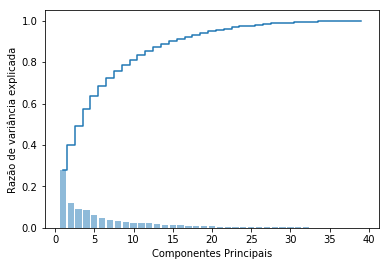

In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Razão de variância explicada')
plt.xlabel('Componentes Principais')
plt.show()

Notamos que com dois componentes já conseguimos explicar 40% da variância. 
O método PCA terá perda de informação, mas ainda nos ajudará a entender os componentes mais relevantes. Em particular, a redução dos dados é considerável - aproximadamente 2 componentes, extraídos das 68 features iniciais, explicam 80% da variância.

In [29]:
y_train

array([2., 0., 2., 1., 0., 1., 1., 0., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 2., 1., 1., 1., 0., 1., 2., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1.])

Vamos transformar os dados em y_train

In [30]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

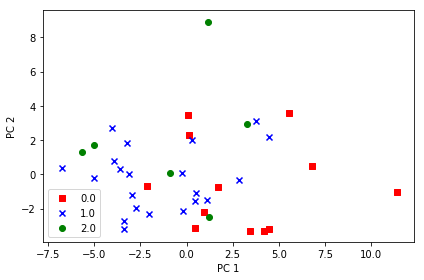

In [31]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()